- 작성자 :신재호 
- 모듈 형태로 import 하여 사용

> 함수
1. 바닐라모델: catboost_baseline(x_train,y_train,x_test,y_test):  
2. 최적화모델: catboost_model(x_train, y_train, x_test,y_test, 
param={}, computing_type ='CPU'):
3. 그리드서치: catboost_grid(x_train, y_train, x_test,y_test, param_grid={}, computing_type ='CPU'):
4. 트리 표출 : tree_plot(model,x_train,y_train):
5. 중요도 표출: permutation_importance(model,x_test,y_test):
6. 중요도 표출: plot_feature_importance(model,col_names,model_type='',importance_value=[]):


> 모듈사용법
1. %cd 모듈이 있는 위치로 이동  ex) %cd ./drive/MyDrive/SKKU_study/01_Final_assignment/source/
2. ipynb 모듈로 인식하는 패키지 설치, import
- !pip install import_ipynb
- import import_ipynb
3. import 모듈



# Set Environment

In [ ]:
import os
import math
import numpy as np
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold,GridSearchCV

# !pip install catboost
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 146 kB/s 


In [ ]:
#모듈로 사용하지 않을 때 사용

# from google.colab import drive
# drive.mount('/content/drive')

# #디렉터리 세팅
# main_dir = '/content/drive/MyDrive/SKKU_study/01_Final_assignment'
# data_dir = os.path.join(main_dir, 'data')
# processed_data_dir = os.path.join(data_dir, 'processed')
# raw_data_dir = os.path.join(data_dir, 'raw')

# os.makedirs(data_dir, exist_ok=True)
# os.makedirs(processed_data_dir, exist_ok=True)

# #data Read
# train = pd.read_csv(os.path.join(processed_data_dir, 'train.csv'))
# test = pd.read_csv(os.path.join(processed_data_dir, 'test.csv'))
# raw = pd.read_csv(os.path.join(raw_data_dir, 'credit_score_data.csv'))
# target = 'Credit_Score'
# train.shape, test.shape

# #데이터 setting
# x_train = train.drop(target,axis=1)
# y_train = train[target]
# x_test = test.drop(target,axis=1)
# y_test = test[target]

# x_train.shape, y_train.shape, x_test.shape, y_test.shape

Mounted at /content/drive


((75000, 22), (75000,), (25000, 22), (25000,))

# 1. 바닐라모델

In [ ]:
def catboost_baseline(x_train,y_train,x_test,y_test):
  '''
  catboost_baseline모델 
  param:
    train데이터 x, y
    test데이터 x ,y 

  return model
  '''

  model = CatBoostClassifier()
  model.fit(x_train, y_train, eval_set=(x_test, y_test),metric_period = 200)
  test_acc = accuracy_score(list(model.predict(x_test)),y_test)

  confusion = plot_confusion_matrix(model, x_test, y_test,cmap='Blues')  
  print('예측결과 정확도',test_acc)

  return model

In [ ]:
# catboost_baseline(x_train,y_train,x_test,y_test)

# 2. 최적화 모델 

In [ ]:
# CatBoost 모델링
def catboost_model(x_train, y_train, x_test,y_test, param={}, computing_type ='CPU', class_weights):
    '''
    catboost 기본 모델

    params:
      x_train : x 학습 데이터프레임
      y_train : y 학습 데이터프레임
      x_test : x 테스트 데이터프레임
      y_test : y 테스트 데이터프레임
      param : 모델에 들어가는 파라미터, 없으면 임의값 적용
      class_weights:
      computing_type : 'CPU' ,'GPU' 적용
    ex)
      model = catboost_model(x_train, y_train, x_test, y_test, param = {}, computing_type = 'GPU',)


    '''
    
    # input 파라미터가 없으면 현재 최적의 파라미터로 대입
    if len(param.keys()):
        params = {'bagging_temperature': 1.7667222733865562,
               'border_count': 190.14385824950688, 'depth': 14.95981768596572, 
               'l2_leaf_reg': 100.0, 'learning_rate': 0.09356008116567356, 
               'min_data_in_leaf': 4.281513544154046
               }

    #모델 파라미터 세팅
    model = CatBoostClassifier( eval_metric = 'Accuracy',      # 정확도
                                iterations = 2000,               # 반복횟수
                                metric_period = 100,            # 중간결과 출력
                                early_stopping_rounds = 200,     # 중간 종료
                                class_weights = class_weights,
                                task_type = computing_type,    # CPU/GPU 사용
                                **param
                               )
    
    #모델 학습
    # model.fit(x_train,y_train, eval_set=(x_test,y_test))
    model.fit(x_train,y_train)

    #테스트값 기반 출력
    train_acc = accuracy_score(list(model.predict(x_train))), y_train
    test_acc = accuracy_score(list(model.predict(x_test)),y_test)
    print('\n\nTrain Set 기반 accuracy',train_acc)
    print('\n\nTest Set 기반 accuracy',test_acc)

    #confusion matrix 표시
    confusion = plot_confusion_matrix(model, x_test, y_test,cmap='Blues')  

    return model


Learning rate set to 0.120133
0:	learn: 0.6968667	test: 0.6040800	best: 0.6040800 (0)	total: 13.9ms	remaining: 27.7s
100:	learn: 0.7494667	test: 0.6512400	best: 0.6516400 (99)	total: 1.01s	remaining: 19.1s
200:	learn: 0.7754667	test: 0.6673200	best: 0.6675600 (198)	total: 1.86s	remaining: 16.6s
300:	learn: 0.7932267	test: 0.6784000	best: 0.6784000 (300)	total: 2.68s	remaining: 15.1s
400:	learn: 0.8069733	test: 0.6866400	best: 0.6866400 (400)	total: 3.5s	remaining: 14s
500:	learn: 0.8182000	test: 0.6932000	best: 0.6933200 (495)	total: 4.3s	remaining: 12.9s
600:	learn: 0.8283867	test: 0.6980800	best: 0.6983200 (593)	total: 5.12s	remaining: 11.9s
700:	learn: 0.8368267	test: 0.7022800	best: 0.7023600 (699)	total: 5.96s	remaining: 11s
800:	learn: 0.8439600	test: 0.7056800	best: 0.7058800 (799)	total: 7.26s	remaining: 10.9s
900:	learn: 0.8506667	test: 0.7080000	best: 0.7080000 (900)	total: 8.74s	remaining: 10.7s
1000:	learn: 0.8566667	test: 0.7112000	best: 0.7115600 (988)	total: 9.53s	remain

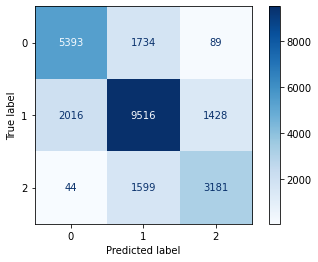

In [ ]:
model = catboost_model(x_train, y_train, x_test, y_test, param = {}, computing_type = 'GPU')


#3. grid_search model

In [ ]:
from IPython.core import history
# CatBoost 모델링
def catboost_grid(x_train, y_train, x_test,y_test, param_grid={}, computing_type ='CPU'):
    '''
    그리드서치를 위한 코드
    
     params:
      x_train : x 학습 데이터프레임
      y_train : y 학습 데이터프레임
      x_test : x 테스트 데이터프레임
      y_test : y 테스트 데이터프레임
      param_grid : grid search 테스트 하기 위한 딕셔너리
      computing_type : 'CPU' ,'GPU' 적용

    ex)
      catboost_grid(x_train,y_train,x_test,y_test,{})
    '''

    if len(list(param_grid.keys())) ==0 :
      param_grid={            
            'grow_policy' : ['Depthwise','Lossguide'],          # 트리 노드 생성 방식 [1) Depthwise(지정한 depth에 이를 때까지 level 순으로 노드 분할). 2) Lossguide(loss 변화가 큰 순으로 노드 분할)]                                                 
            # 'depth' : [8,10],                               # 트리 깊이
            'learning_rate' : [0.02423,0.1063],               # 러닝레이트
            'l2_leaf_reg' : [ 20.35, 5.127],                  # L2 정규화
           
            }
    
    #모델 파라미터 세팅
    model = CatBoostClassifier( eval_metric = 'Accuracy',      # 정확도
                                iterations = 1000,               # 반복횟수
                                metric_period = 200,            # 중간결과 출력
                                early_stopping_rounds = 100,     # 중간 종료
                                task_type = computing_type,    # CPU/GPU 사용
                               )
    
    # gridSearch setting
    gcv=GridSearchCV(model, param_grid=param_grid,  n_jobs=1)
    
    # gridSearch fit
    gcv.fit(x_train,y_train)

    # 결과 출력
    print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
    print('best score', gcv.best_score_)      # 최고의 점수

    #최고 결과값 출력
    test_acc = accuracy_score(list(gcv.predict(x_test)),y_test)
    print('최종 예측 정확도',test_acc)

    #최적의 파라미터 return
    return gcv.best_params_


In [ ]:
catboost_grid(x_train,y_train,x_test,y_test,)

#4.tree plot 

In [ ]:

def tree_plot(model,x_train,y_train):
    '''
    트리구조의 결과 표출
    '''
    pool = Pool(x_train,y_train)
    image = model.plot_tree(
        tree_idx=0,
        pool=pool, 
    )

    return image

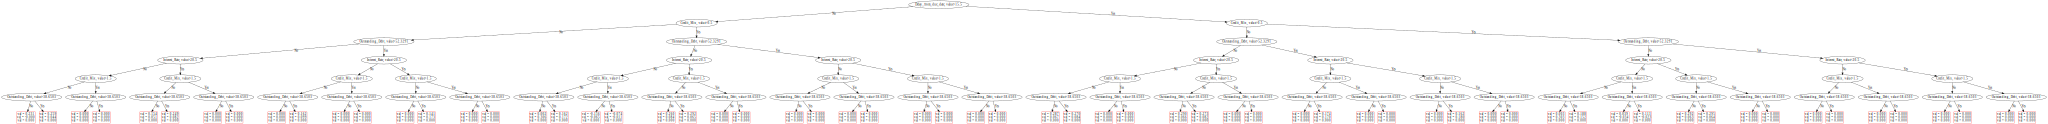

In [ ]:
tree_plot(model,x_train,y_train)

# 5. permutation_importance

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

def permutation_importance(model,x_test,y_test):
    
    perm = PermutationImportance(model, random_state=3).fit(x_test, y_test)
    eli5.show_weights(perm, feature_names = x_test.columns.tolist(), top=100)

# 6. plot_feature_importance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model,col_names,model_type='',importance_value=[]):
    '''
    모델의 importance plot하는 함수

    params:
      model : 출력하고자하는 모델
      col_name : features 이름 리스트
      model_type : plt title 출력을 위해 모델 이름 string입력

    ex)
    plot_feature_importance(model,x_test.columns,'CATBOOST',importance_value=model.get_feature_importance())
    plot_feature_importance(model,x_test.columns,'CATBOOST')

    '''
    
    importance = model.get_feature_importance()

    #importance_value를 대신 넣어주면 해당 값으로 출력
    if len(importance_value) !=0:
      importance = importance_value
    
    feature_importance = np.array(importance)
    feature_names = np.array(col_names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

# 베이지안 옵티마이저

- https://wooono.tistory.com/102
- https://data-newbie.tistory.com/159

In [ ]:
def catboost_cv(bagging_temperature,depth,learning_rate,min_data_in_leaf,l2_leaf_reg,border_count ):
    model = CatBoostClassifier( 
        
        metric_period = 100,            # 중간결과 출력
        early_stopping_rounds = 100,     # 중간 종료
        # task_type = 'GPU',    # CPU/GPU 사용


      
       bagging_temperature = bagging_temperature
       ,depth = int(depth)
       ,learning_rate = learning_rate
       ,min_data_in_leaf = min_data_in_leaf
      #  ,max_leaves =int(max_leaves)
       ,l2_leaf_reg = l2_leaf_reg
       ,border_count = int(border_count)
                               )
    
    #데이터는 전역변수여야함
    model.fit(x_train,y_train, eval_set=(x_test,y_test))

    test_acc = accuracy_score(list(model.predict(x_test)),y_test)

    # #test_acc 저장
    # wandb.log({'best_score':test_acc})  
    
    # #파라미터 저장
    # all_param = model.get_all_params()
    # data =pd.DataFrame({'param':all_param.keys(),'value':all_param.values()})
    # data['value']=data['value'].astype('string')
    # wandb.log({'param':data})    
    
    print('===================test 정확도 : ',test_acc,'\n\n')
    return  test_acc

In [ ]:
#  bayesian-optimization 라이브러리의 BayesianOptimization 클래스 import
!pip install bayesian-optimization 
from bayes_opt import BayesianOptimization
import numpy as np

# 실험해보고자하는 hyperparameter 집합
pbounds = {               
                        #  'grow_policy' : ['Depthwise','Lossguide'],
                          'bagging_temperature': (0, 100),
                          'depth': (7, 15) ,
                          "learning_rate" : (0.01,0.2) , 
                          "min_data_in_leaf" : (1,5) , 
                          # 'max_leaves' : (100,200)  ,
                          'l2_leaf_reg': (100, 100)  ,
                          'border_count': (100, 300) ,
                          
                          }

# Bayesian optimization 객체 생성
# f : 탐색 대상 함수, pbounds : hyperparameter 집합
# verbose = 2 항상 출력, verbose = 1 최댓값일 때 출력, verbose = 0 출력 안함
# random_state : Bayesian Optimization 상의 랜덤성이 존재하는 부분을 통제 
bo=BayesianOptimization(f=catboost_cv, pbounds=pbounds, verbose=2, random_state=1 )    

# 메소드를 이용해 최대화 과정 수행
# init_points :  초기 Random Search 갯수
# n_iter : 반복 횟수 (몇개의 입력값-함숫값 점들을 확인할지! 많을 수록 정확한 값을 얻을 수 있다.)
# acq : Acquisition Function들 중 Expected Improvement(EI) 를 사용
# xi : exploration 강도 (기본값은 0.0)
bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)

# ‘iter’는 반복 회차, ‘target’은 목적 함수의 값, 나머지는 입력값을 나타냅니다. 
# 현재 회차 이전까지 조사된 함숫값들과 비교하여, 현재 회차에 최댓값이 얻어진 경우, 
# bayesian-optimization 라이브러리는 이를 자동으로 다른 색 글자로 표시하는 것을 확인할 수 있습니다

# 찾은 파라미터 값 확인
print(bo.max)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


|   iter    |  target   | baggin... | border... |   depth   | l2_lea... | learni... | min_da... |
-------------------------------------------------------------------------------------------------
0:	learn: 1.0909967	test: 1.0917508	best: 1.0917508 (0)	total: 23.3ms	remaining: 23.2s


100:	learn: 0.9971378	test: 1.0176349	best: 1.0168168 (58)	total: 1.87s	remaining: 16.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.016816821
bestIteration = 58

Shrink model to first 59 iterations.
===================test 정확도 :  0.5184 


| 1         | 0.5184    | 41.7      | 244.1     | 7.001     | 100.0     | 0.03788   | 1.369     |


0:	learn: 1.0762457	test: 1.0801233	best: 1.0801233 (0)	total: 142ms	remaining: 2m 21s
100:	learn: 0.6461497	test: 0.8177632	best: 0.8177632 (100)	total: 13.6s	remaining: 2m
200:	learn: 0.5968186	test: 0.8008810	best: 0.8008810 (200)	total: 28.9s	remaining: 1m 54s
300:	learn: 0.5684449	test: 0.7893210	best: 0.7893210 (300)	total: 44.5s	remaining: 1m 43s
400:	learn: 0.5439465	test: 0.7785539	best: 0.7785539 (400)	total: 57.9s	remaining: 1m 26s
500:	learn: 0.5229526	test: 0.7703118	best: 0.7703118 (500)	total: 1m 11s	remaining: 1m 11s
600:	learn: 0.5053497	test: 0.7633641	best: 0.7633222 (599)	total: 1m 26s	remaining: 57.6s
700:	learn: 0.4888838	test: 0.7572463	best: 0.7572463 (700)	total: 1m 40s	remaining: 42.7s
800:	learn: 0.4735001	test: 0.7521947	best: 0.7521947 (800)	total: 1m 53s	remaining: 28.2s
900:	learn: 0.4599417	test: 0.7479439	best: 0.7479439 (900)	total: 2m 6s	remaining: 13.9s
999:	learn: 0.4471253	test: 0.7444260	best: 0.7444260 (999)	total: 2m 23s	remaining: 0us

bestTest

0:	learn: 1.0836569	test: 1.0861777	best: 1.0861777 (0)	total: 144ms	remaining: 2m 23s
100:	learn: 0.6762653	test: 0.8278603	best: 0.8278603 (100)	total: 13.3s	remaining: 1m 58s
200:	learn: 0.6201517	test: 0.8100822	best: 0.8100822 (200)	total: 26.5s	remaining: 1m 45s
300:	learn: 0.5910329	test: 0.7975258	best: 0.7975258 (300)	total: 39.7s	remaining: 1m 32s
400:	learn: 0.5689359	test: 0.7874124	best: 0.7874124 (400)	total: 54.9s	remaining: 1m 22s
500:	learn: 0.5501853	test: 0.7796618	best: 0.7796618 (500)	total: 1m 8s	remaining: 1m 7s
600:	learn: 0.5347378	test: 0.7742526	best: 0.7742341 (599)	total: 1m 21s	remaining: 53.9s
700:	learn: 0.5203605	test: 0.7684649	best: 0.7684649 (700)	total: 1m 34s	remaining: 40.2s
800:	learn: 0.5070783	test: 0.7637811	best: 0.7637811 (800)	total: 1m 49s	remaining: 27.2s
900:	learn: 0.4952083	test: 0.7599972	best: 0.7599972 (900)	total: 2m 2s	remaining: 13.5s
999:	learn: 0.4836318	test: 0.7556552	best: 0.7556552 (999)	total: 2m 15s	remaining: 0us

bestTe

0:	learn: 1.0889090	test: 1.0904622	best: 1.0904622 (0)	total: 55.2ms	remaining: 55.1s
100:	learn: 0.7635924	test: 0.8581410	best: 0.8581410 (100)	total: 4.41s	remaining: 39.2s
200:	learn: 0.6950964	test: 0.8322222	best: 0.8322222 (200)	total: 8.65s	remaining: 34.4s
300:	learn: 0.6664358	test: 0.8244226	best: 0.8244226 (300)	total: 12.9s	remaining: 29.9s
400:	learn: 0.6455018	test: 0.8185123	best: 0.8185123 (400)	total: 17.1s	remaining: 25.5s
500:	learn: 0.6314452	test: 0.8111641	best: 0.8111585 (498)	total: 21.3s	remaining: 21.2s
600:	learn: 0.6205492	test: 0.8059173	best: 0.8059173 (600)	total: 26.9s	remaining: 17.9s
700:	learn: 0.6119284	test: 0.8009916	best: 0.8009916 (700)	total: 32s	remaining: 13.6s
800:	learn: 0.6048421	test: 0.7966188	best: 0.7966188 (800)	total: 36.3s	remaining: 9.02s
900:	learn: 0.5989988	test: 0.7932925	best: 0.7932925 (900)	total: 40.5s	remaining: 4.45s
999:	learn: 0.5929586	test: 0.7905159	best: 0.7905159 (999)	total: 44.7s	remaining: 0us

bestTest = 0.790

0:	learn: 0.9880193	test: 1.0166091	best: 1.0166091 (0)	total: 43.3ms	remaining: 43.2s
100:	learn: 0.6134236	test: 0.8035227	best: 0.8031849 (97)	total: 4.22s	remaining: 37.6s
200:	learn: 0.5770950	test: 0.7837847	best: 0.7837847 (200)	total: 8.29s	remaining: 32.9s
300:	learn: 0.5528510	test: 0.7708131	best: 0.7708131 (300)	total: 12.3s	remaining: 28.5s
400:	learn: 0.5344362	test: 0.7619387	best: 0.7619387 (400)	total: 16.3s	remaining: 24.3s
500:	learn: 0.5191612	test: 0.7555162	best: 0.7554208 (495)	total: 20.3s	remaining: 20.2s
600:	learn: 0.5045483	test: 0.7502901	best: 0.7501804 (590)	total: 24.3s	remaining: 16.1s
700:	learn: 0.4914090	test: 0.7458035	best: 0.7458035 (700)	total: 28.3s	remaining: 12.1s
800:	learn: 0.4792742	test: 0.7410498	best: 0.7410414 (798)	total: 32.3s	remaining: 8.01s
900:	learn: 0.4687740	test: 0.7379850	best: 0.7379850 (900)	total: 36.2s	remaining: 3.98s
999:	learn: 0.4588769	test: 0.7338933	best: 0.7338623 (997)	total: 43.4s	remaining: 0us

bestTest = 0.73

0:	learn: 1.0033084	test: 1.0267405	best: 1.0267405 (0)	total: 91.6ms	remaining: 1m 31s
100:	learn: 0.5753742	test: 0.7808491	best: 0.7808491 (100)	total: 4.75s	remaining: 42.3s
200:	learn: 0.5508268	test: 0.7630839	best: 0.7630839 (200)	total: 8.47s	remaining: 33.7s
300:	learn: 0.5315386	test: 0.7512429	best: 0.7512429 (300)	total: 12.1s	remaining: 28.2s
400:	learn: 0.5156470	test: 0.7423378	best: 0.7423378 (400)	total: 15.8s	remaining: 23.6s
500:	learn: 0.5015364	test: 0.7344527	best: 0.7344527 (500)	total: 19.5s	remaining: 19.5s
600:	learn: 0.4894447	test: 0.7280853	best: 0.7280853 (600)	total: 23.3s	remaining: 15.5s
700:	learn: 0.4779950	test: 0.7219797	best: 0.7219797 (700)	total: 27s	remaining: 11.5s
800:	learn: 0.4671778	test: 0.7160486	best: 0.7160486 (800)	total: 30.8s	remaining: 7.65s
900:	learn: 0.4571062	test: 0.7108580	best: 0.7108530 (897)	total: 34.6s	remaining: 3.8s
999:	learn: 0.4476029	test: 0.7060893	best: 0.7060893 (999)	total: 38.3s	remaining: 0us

bestTest = 0.706

0:	learn: 1.0821461	test: 1.0875347	best: 1.0875347 (0)	total: 763ms	remaining: 12m 42s
100:	learn: 0.6599755	test: 0.8196498	best: 0.8196498 (100)	total: 1m 6s	remaining: 9m 55s
200:	learn: 0.6123503	test: 0.7963543	best: 0.7963543 (200)	total: 2m 24s	remaining: 9m 34s
300:	learn: 0.5845742	test: 0.7840698	best: 0.7840698 (300)	total: 3m 38s	remaining: 8m 26s
400:	learn: 0.5630005	test: 0.7739258	best: 0.7739258 (400)	total: 4m 49s	remaining: 7m 12s
500:	learn: 0.5456499	test: 0.7657258	best: 0.7657258 (500)	total: 6m 7s	remaining: 6m 5s
600:	learn: 0.5317614	test: 0.7585256	best: 0.7585256 (600)	total: 7m 20s	remaining: 4m 52s
700:	learn: 0.5191896	test: 0.7518558	best: 0.7518558 (700)	total: 8m 32s	remaining: 3m 38s
800:	learn: 0.5070869	test: 0.7449668	best: 0.7449668 (800)	total: 9m 44s	remaining: 2m 25s
900:	learn: 0.4957999	test: 0.7386504	best: 0.7386504 (900)	total: 10m 59s	remaining: 1m 12s
999:	learn: 0.4854752	test: 0.7333186	best: 0.7333186 (999)	total: 12m 9s	remaining: 0

0:	learn: 1.0593453	test: 1.0691870	best: 1.0691870 (0)	total: 1.41s	remaining: 23m 25s
100:	learn: 0.6055184	test: 0.7926408	best: 0.7926408 (100)	total: 2m 15s	remaining: 20m 1s
200:	learn: 0.5484421	test: 0.7664783	best: 0.7664783 (200)	total: 4m 38s	remaining: 18m 26s
300:	learn: 0.5067557	test: 0.7483871	best: 0.7483871 (300)	total: 6m 59s	remaining: 16m 14s
400:	learn: 0.4753293	test: 0.7334067	best: 0.7334067 (400)	total: 9m 19s	remaining: 13m 55s
500:	learn: 0.4489821	test: 0.7208840	best: 0.7208840 (500)	total: 11m 42s	remaining: 11m 39s
600:	learn: 0.4255210	test: 0.7103000	best: 0.7102985 (599)	total: 14m 1s	remaining: 9m 18s
700:	learn: 0.4045751	test: 0.7011916	best: 0.7011916 (700)	total: 16m 35s	remaining: 7m 4s
800:	learn: 0.3868093	test: 0.6944577	best: 0.6944577 (800)	total: 19m 11s	remaining: 4m 46s
900:	learn: 0.3705718	test: 0.6884624	best: 0.6884624 (900)	total: 21m 35s	remaining: 2m 22s
999:	learn: 0.3560812	test: 0.6842758	best: 0.6842758 (999)	total: 23m 58s	re

0:	learn: 1.0823006	test: 1.0906360	best: 1.0906360 (0)	total: 747ms	remaining: 12m 26s
100:	learn: 0.6083165	test: 0.8129395	best: 0.8129395 (100)	total: 1m 13s	remaining: 10m 53s
200:	learn: 0.5325847	test: 0.7883673	best: 0.7883673 (200)	total: 2m 26s	remaining: 9m 40s
300:	learn: 0.4814847	test: 0.7728682	best: 0.7728682 (300)	total: 3m 37s	remaining: 8m 24s
400:	learn: 0.4399663	test: 0.7624200	best: 0.7624022 (399)	total: 4m 47s	remaining: 7m 9s
500:	learn: 0.4048329	test: 0.7536539	best: 0.7535902 (497)	total: 5m 58s	remaining: 5m 57s
600:	learn: 0.3747785	test: 0.7469814	best: 0.7469814 (600)	total: 7m 13s	remaining: 4m 47s
700:	learn: 0.3488169	test: 0.7412551	best: 0.7412551 (700)	total: 8m 23s	remaining: 3m 34s
800:	learn: 0.3254545	test: 0.7364515	best: 0.7364515 (800)	total: 9m 34s	remaining: 2m 22s
900:	learn: 0.3048668	test: 0.7336895	best: 0.7336895 (900)	total: 10m 46s	remaining: 1m 11s
999:	learn: 0.2862818	test: 0.7307887	best: 0.7307887 (999)	total: 11m 56s	remainin

0:	learn: 1.0812202	test: 1.0829885	best: 1.0829885 (0)	total: 27.5ms	remaining: 27.5s
100:	learn: 0.9970889	test: 1.0180887	best: 1.0168126 (23)	total: 1.88s	remaining: 16.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.016812559
bestIteration = 23

Shrink model to first 24 iterations.
===================test 정확도 :  0.5184 


| 10        | 0.5184    | 99.8      | 101.6     | 12.27     | 100.0     | 0.08883   | 1.549     |


0:	learn: 1.0623540	test: 1.0662631	best: 1.0662631 (0)	total: 20.7ms	remaining: 20.7s
100:	learn: 0.9970889	test: 1.0180909	best: 1.0168078 (9)	total: 1.88s	remaining: 16.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 1.016807807
bestIteration = 9

Shrink model to first 10 iterations.
===================test 정확도 :  0.5184 


| 11        | 0.5184    | 99.82     | 298.8     | 13.66     | 100.0     | 0.1964    | 1.783     |


0:	learn: 1.0701577	test: 1.0795342	best: 1.0795342 (0)	total: 451ms	remaining: 7m 30s
100:	learn: 0.5922629	test: 0.7942394	best: 0.7942394 (100)	total: 25s	remaining: 3m 42s
200:	learn: 0.5484415	test: 0.7762134	best: 0.7762134 (200)	total: 47.7s	remaining: 3m 9s
300:	learn: 0.5170851	test: 0.7627393	best: 0.7627393 (300)	total: 1m 12s	remaining: 2m 48s
400:	learn: 0.4913360	test: 0.7538287	best: 0.7538287 (400)	total: 1m 35s	remaining: 2m 22s
500:	learn: 0.4681654	test: 0.7465375	best: 0.7465375 (500)	total: 1m 59s	remaining: 1m 58s
600:	learn: 0.4475571	test: 0.7403645	best: 0.7403629 (599)	total: 2m 25s	remaining: 1m 36s
700:	learn: 0.4287281	test: 0.7355672	best: 0.7355672 (700)	total: 2m 48s	remaining: 1m 11s
800:	learn: 0.4113259	test: 0.7307611	best: 0.7307611 (800)	total: 3m 12s	remaining: 47.9s
900:	learn: 0.3952082	test: 0.7268788	best: 0.7268788 (900)	total: 3m 35s	remaining: 23.7s
999:	learn: 0.3802023	test: 0.7233245	best: 0.7233245 (999)	total: 3m 57s	remaining: 0us

be

# KFOLD 방식

In [ ]:

# kfold CatBoost 모델링
def catboost_modeling_kfold(x_train, y_train, x_test, y_test,params, kfold_num,computing_type ='CPU'):

  # 빈 Series인 test_pred 생성
  test_pred = pd.Series([0 for x in range(len(x_test))], index=x_test.index)

  #Kfold setting
  kf = KFold(n_splits= kfold_num)

  for train_index, valid_index in kf.split(x_train):
    # K-fold 모델링을 반복할 것
    print('\n\n========================================== fold ==========================================')

    # kfold에서 분리된 인덱스 기준으로 train / valid split
    train_X, train_y = x_train.iloc[train_index], y_train[train_index]
    valid_X, valid_y = x_train.iloc[valid_index], y_train[valid_index]
    
    #모델 파라미터 세팅
    model = CatBoostClassifier(
                                eval_metric = 'Accuracy',              # AUC로 성능 측정
                                iterations = 25,               # 반복횟수 최대 25000
                                metric_period = 25,            # 중간결과 출력X
                                early_stopping_rounds = 1000,     # 1000iteration 동안 AUC 증가 없으면 학습 중단
                                task_type = 'CPU',                # GPU 사용
                                **params
                                )
    
    # 모델 학습
    model.fit(train_X, train_y, eval_set=(valid_X, valid_y))

    # test accuracy 계산
    test_acc = accuracy_score(list(model.predict(x_test)),y_test)
    print('test 결과',test_acc)



  return model